#EDA and Hypothesis Testing for Insurance Cost Prediction

For the Insurance Cost Prediction project, EDA will involve visualizing distributions, identifying outliers, and exploring correlations between different variables like age, diabetes status, weight, and premium costs. This analysis aims to unearth significant predictors of insurance costs and understand the demographic and health-related characteristics that most influence premium pricing.<br><br>

Hypothesis testing will be used to formally test assumptions such as:
- Are premium costs significantly higher for smokers compared to non-smokers?
- Does the presence of chronic diseases lead to higher insurance premiums?
- Is there a significant difference in premium costs based on the number of major surgeries a person has had?

These statistical tests will help validate whether the observed patterns in the data are statistically significant or occur by chance, thereby reinforcing the robustness of subsequent predictive modeling


## 📑 Exploratory Data Analysis (EDA) and Hypothesis Testing

As part of the **Insurance Cost Prediction** project, a detailed Exploratory Data Analysis (EDA) and Hypothesis Testing process was conducted to gain deeper insights into the dataset and validate key assumptions about insurance premium pricing.

---

### 📊 Exploratory Data Analysis (EDA)

The EDA phase focused on understanding the underlying patterns and relationships within the data. Key objectives included:

* **Visualizing distributions** of important variables such as **age**, **weight**, **premium costs**, and various health conditions.
* **Identifying outliers** and potential anomalies in continuous variables like **premium price** and **BMI**.
* Exploring **correlations between demographic and health-related factors** and their relationship with insurance costs.
* Assessing the impact of individual risk factors (e.g., diabetes, chronic diseases, number of major surgeries) on insurance premiums through visual and statistical summaries.

This analysis helped highlight the most influential factors affecting premium pricing, providing a foundation for subsequent predictive modeling.

---

### 🧪 Hypothesis Testing

To complement the EDA findings, formal **hypothesis testing** was conducted to evaluate key assumptions regarding the factors influencing insurance premiums. The following hypotheses were tested:

* 📌 **Are premium costs significantly higher for smokers compared to non-smokers?**
* 📌 **Does the presence of chronic diseases result in higher insurance premiums?**
* 📌 **Is there a significant difference in premium costs based on the number of major surgeries a person has undergone?**

Appropriate statistical tests, including **independent t-tests**, **one-way ANOVA**, and **correlation analysis**, were applied to determine whether the observed differences and relationships were statistically significant.

The outcomes of these tests provided valuable evidence to support or refute assumptions derived from the EDA, thereby enhancing the overall reliability of the predictive modeling process and offering actionable insights for insurance policy pricing strategies.

---

Would you like me to help you structure a clean Python notebook outline for this next? I can map out the EDA sections, visualizations, and hypothesis tests ready for you to fill in with code. 🚀


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind, f_oneway, shapiro, boxcox, randint, uniform
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [141]:
# Downloading the Dataset

!gdown 1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 49.3MB/s]


In [142]:
# Loading the dataset using pandas
original_df = pd.read_csv("insurance.csv")
original_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [143]:
# Shape of the data

original_df.shape

(986, 11)

This dataset has 986 rows and 11 columns (features)

In [144]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


The above table represents the datatype of each column. All columns have int datatype.

In [145]:
original_df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


## 📌 Dataset Summary Observations

* **Age**:
  The ages of individuals range from **18 to 66 years**, with a **mean age of approximately 41.7 years**. The distribution is fairly spread out, with a standard deviation of **14 years**.

* **Health Conditions (Binary Variables: 0 = No, 1 = Yes)**:

  * **Diabetes**: Around **42%** of individuals have diabetes.
  * **Blood Pressure Problems**: Present in about **47%** of the dataset.
  * **Any Transplants**: Relatively rare, with only **5.6%** having undergone a transplant.
  * **Any Chronic Diseases**: Found in approximately **18%** of individuals.
  * **Known Allergies**: Present in about **21.5%** of the dataset.
  * **History of Cancer in Family**: Around **11.8%** report a family history of cancer.

* **Physical Attributes**:

  * **Height** ranges from **145 cm to 188 cm**, with an average height of **168.2 cm**.
  * **Weight** varies between **51 kg and 132 kg**, with a mean weight of **77 kg**.

* **Number of Major Surgeries**:

  * Ranges from **0 to 3 surgeries**.
  * The median is **1 surgery**, with most individuals having either **0 or 1 surgery**.

* **Premium Price**:

  * Premium prices range from **15,000 to 40,000**.
  * The **average premium is around 24,337**, with a standard deviation of **6,248**, indicating moderate variability.
  * The **25th percentile is at 21,000**, the **median is 23,000**, and the **75th percentile at 28,000**, suggesting a somewhat right-skewed distribution.


### Distribution Analysis

In [146]:
# COpying the dataframe
df = original_df.copy()

Distribution of Continuous Variables

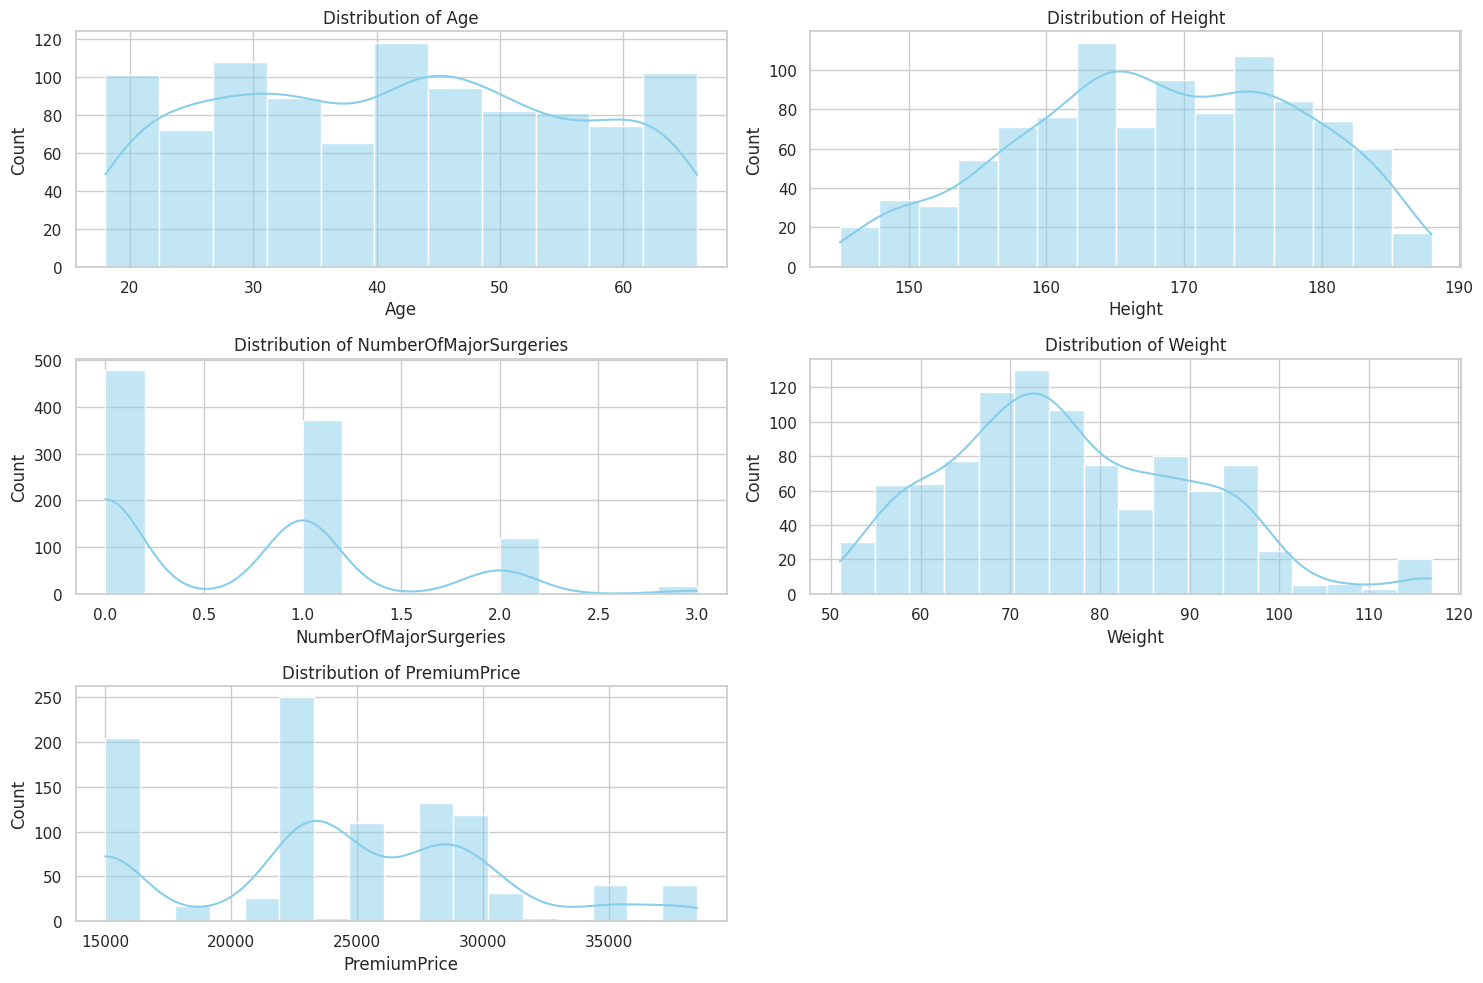

In [202]:
# Set plotting style
sns.set(style="whitegrid")

# List of continuous variables
continuous_vars = ['Age', 'Height', 'NumberOfMajorSurgeries', 'Weight', 'PremiumPrice']

# Plot histograms with KDE for each
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=var, kde=True, color='skyblue')
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()


**Distribution of Key Variables**

The set of histograms above displays the distribution of several important numerical variables in the dataset:

* **Age**: Fairly evenly spread across the adult age range, with slight peaks around 25, 40, and 65 years.
* **Height**: Shows a roughly normal distribution, centered around 165-170 cm.
* **Weight**: Positively skewed, with most individuals weighing between 65 and 85 kg, and a small number of higher weight outliers.
* **Number of Major Surgeries**: Majority of individuals have had zero or one major surgery, with very few reporting two or three.
* **Premium Price**: Right-skewed distribution, with most premiums clustering between 20,000 and 30,000 units, but some values extending up to 40,000.

These distributions help us understand the characteristics of the dataset and highlight areas of skewness or imbalance, which could impact model performance and feature scaling.

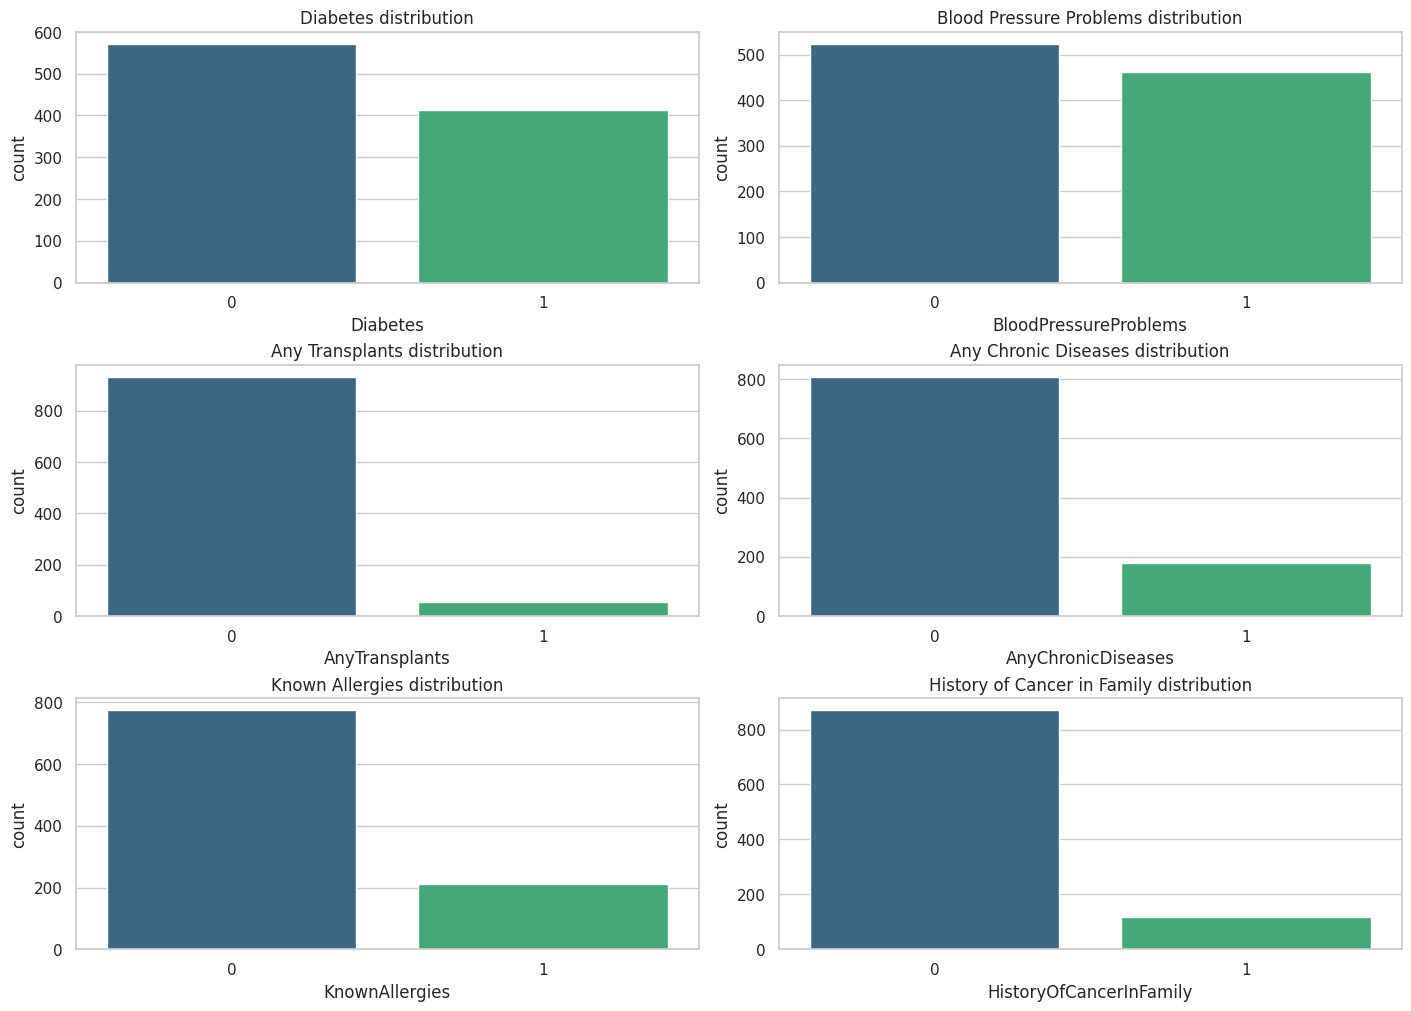

In [200]:
fig, axs = plt.subplots(3, 2, figsize=(14,10), constrained_layout=True)
sns.countplot(x='Diabetes', data=df, ax=axs[0,0], palette='viridis')
axs[0,0].set_title("Diabetes distribution")
sns.countplot(x='BloodPressureProblems', data=df, ax=axs[0,1], palette='viridis')
axs[0,1].set_title("Blood Pressure Problems distribution")
sns.countplot(x='AnyTransplants', data=df, ax=axs[1,0], palette='viridis')
axs[1,0].set_title("Any Transplants distribution")
sns.countplot(x='AnyChronicDiseases', data=df, ax=axs[1,1], palette='viridis')
axs[1,1].set_title("Any Chronic Diseases distribution")
sns.countplot(x='KnownAllergies', data=df, ax=axs[2,0], palette='viridis')
axs[2,0].set_title("Known Allergies distribution")
sns.countplot(x='HistoryOfCancerInFamily', data=df, ax=axs[2,1], palette='viridis')
axs[2,1].set_title("History of Cancer in Family distribution")
plt.show()


Count Plot for Number of Major Surgeries

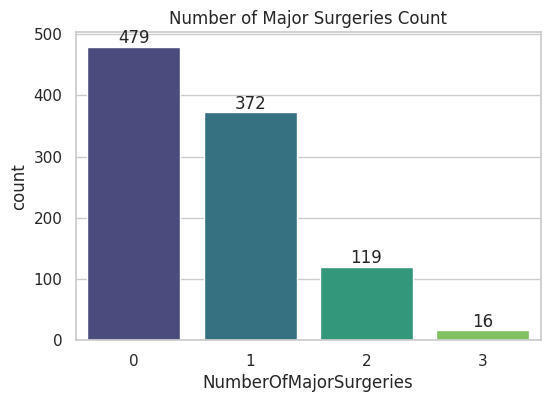

In [148]:
plt.figure(figsize=(6,4))
plot1 = sns.countplot(x='NumberOfMajorSurgeries', data=df, palette='viridis')
for i in plot1.containers:
    plot1.bar_label(i,)
plt.title('Number of Major Surgeries Count')
plt.show()

**Distribution of Number of Major Surgeries**

The bar graph illustrates the distribution of patients based on the number of major surgeries they have undergone:

* **0 surgeries**: 479 patients
* **1 surgery**: 372 patients
* **2 surgeries**: 119 patients
* **3 surgeries**: 16 patients

The majority of individuals in the dataset have had **zero or one major surgery**, while a smaller portion reported two, and very few had three. This indicates a right-skewed distribution, where most of the population experiences fewer surgical interventions.


Boxplot for Premium Price by Number of Major Surgeries

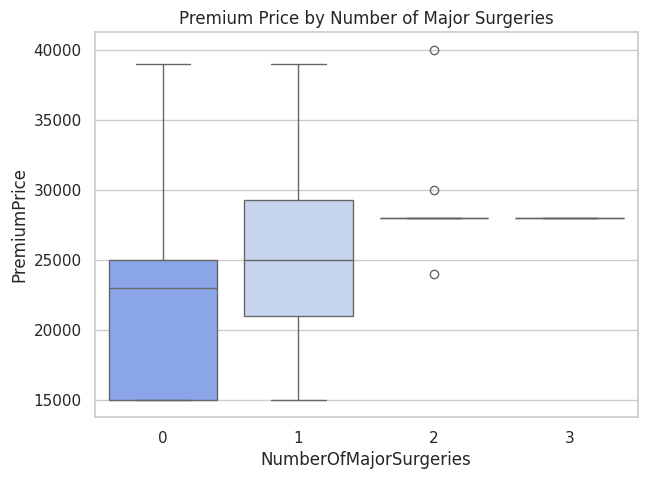

In [149]:
plt.figure(figsize=(7,5))
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df, palette='coolwarm')
plt.title('Premium Price by Number of Major Surgeries')
plt.show()

**Premium Price by Number of Major Surgeries**

This boxplot illustrates the distribution of insurance premium prices segmented by the number of major surgeries undergone by individuals.

* **General Trend**: As the number of major surgeries increases, the median premium price tends to rise.
* **0 Surgeries**: The widest spread in premium prices is seen in this group, ranging from around 15,000 to nearly 40,000. The median sits around 23,000, with several higher outliers.
* **1 Surgery**: This group also shows a broad distribution but with a slightly higher median compared to those with no surgeries.
* **2 and 3 Surgeries**: The premium prices for individuals with 2 or 3 surgeries are notably more concentrated, with consistently higher medians near the upper end of the pricing range, reflecting insurers’ higher risk assessment for these cases.
* **Outliers**: Across all groups, there are a few premium prices standing significantly above the whiskers, especially among those with no surgeries.

**Insight**: This visualization highlights a clear positive association between the number of major surgeries and insurance premium prices — a valuable pattern for risk-based pricing models.

BMI Distribution

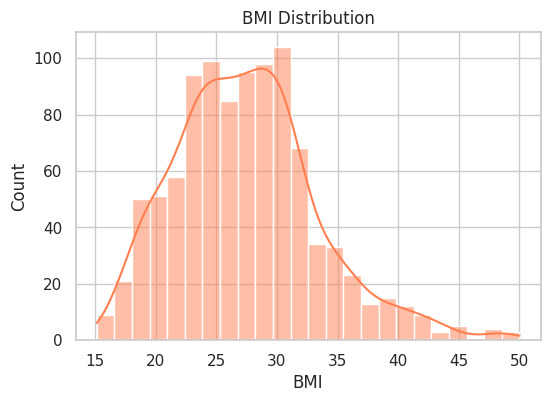

In [150]:
# Calculate BMI
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

# Plot BMI Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['BMI'], kde=True, color='coral')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

**BMI Distribution**

The histogram displays the distribution of Body Mass Index (BMI) values in the dataset. Most BMI values fall between **20 and 35**, with a noticeable peak around **27 to 30**. The distribution is **right-skewed**, with fewer individuals having higher BMI values above 35. This suggests that while the majority of the population maintains a BMI within the normal to overweight range, a smaller segment is classified as obese.

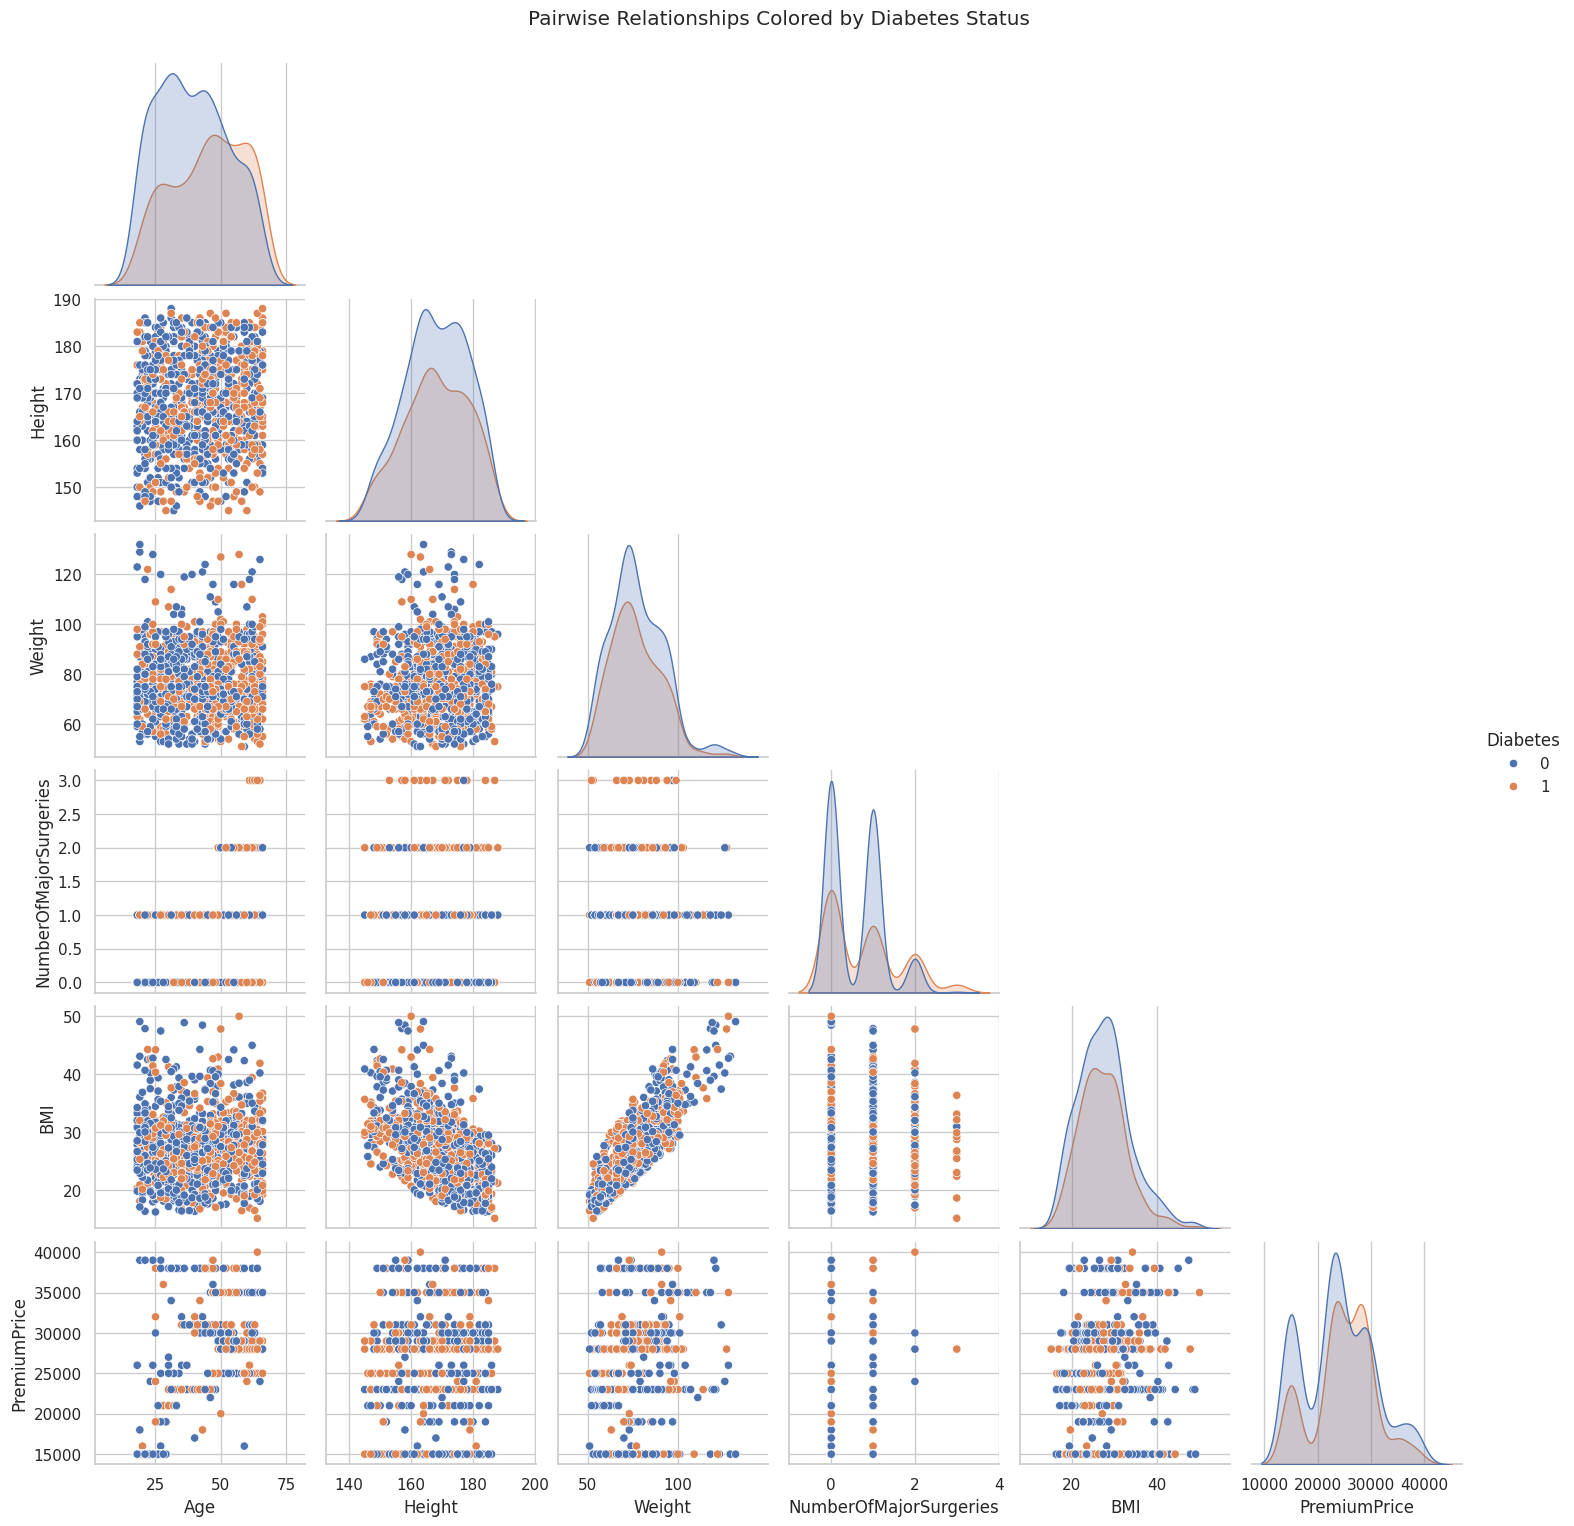

In [151]:
# Select relevant continuous variables
pairplot_vars = ['Age', 'Height', 'Weight', 'NumberOfMajorSurgeries', 'BMI', 'PremiumPrice']

sns.pairplot(df[pairplot_vars + ['Diabetes']], hue='Diabetes', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Colored by Diabetes Status', y=1.02)
plt.show()

**Pairwise Relationships by Diabetes Status**

This pairplot visualizes the relationships between key numerical variables in the dataset, color-coded by diabetes status.

* **Distribution trends**: Individuals without diabetes (blue) are more frequent across most variables, reflecting a higher proportion in the dataset.
* **BMI vs Weight**: As expected, there's a strong positive correlation between BMI and weight.
* **PremiumPrice** shows noticeable variation with BMI and NumberOfMajorSurgeries, indicating higher premiums for individuals with higher BMI or multiple surgeries.
* **NumberOfMajorSurgeries** is mostly concentrated at lower counts (0 or 1) for both groups, though premiums tend to rise with more surgeries.
* **Diabetes status** has a subtle effect on distributions — for example, those with diabetes (orange) tend to have slightly higher BMI and premiums, visible in the density plots.

Overall, the plot provides a good overview of variable distributions and interrelationships, with clear separation trends around BMI, weight, and premium pricing, which are important drivers in health insurance modeling.

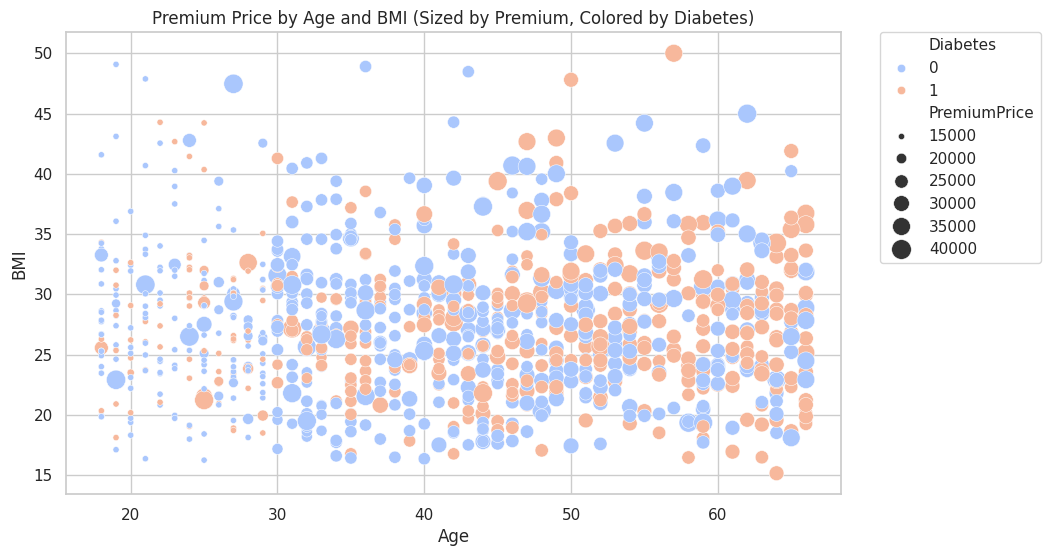

In [152]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='BMI', size='PremiumPrice', hue='Diabetes', data=df, palette='coolwarm', sizes=(20, 200))
plt.title('Premium Price by Age and BMI (Sized by Premium, Colored by Diabetes)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

**Premium Price by Age and BMI (Sized by Premium, Colored by Diabetes Status)**

This scatter plot visualizes the relationship between **Age**, **BMI**, and **Insurance Premium Price**, with additional segmentation by **Diabetes status**. Each point represents an individual, where:

* **X-axis**: Age
* **Y-axis**: BMI
* **Point Size**: Insurance Premium Price (larger circles indicate higher premiums)
* **Color**: Diabetes status (blue = no diabetes, orange = has diabetes)

**Key Observations:**

* **Premium Price Patterns**: Larger points (higher premiums) are generally found among individuals with higher BMIs and older ages. This aligns with expectations as both age and BMI are known risk factors influencing health insurance pricing.
* **Diabetes Impact**: While both diabetic and non-diabetic individuals are distributed across the plot, a notable clustering of higher premiums can be observed among those with diabetes, especially at elevated BMI levels.
* **Age and BMI Interaction**: There’s a relatively dense cluster of individuals between the ages of 30 to 60 with BMI values ranging from 20 to 35. Within this cluster, point sizes vary, indicating that premium prices are influenced by a combination of these two variables and possibly other health factors.
* **High-Risk Groups**: The upper-right section of the plot (higher BMI and older age) contains some of the largest point sizes, reflecting higher insurance premiums for these high-risk individuals.

**Insight**: This plot effectively demonstrates how **age**, **BMI**, and **diabetes status** collectively influence insurance premiums, with higher risk profiles (older, higher BMI, diabetic) tending toward more expensive premium rates.

###Correlation Analysis

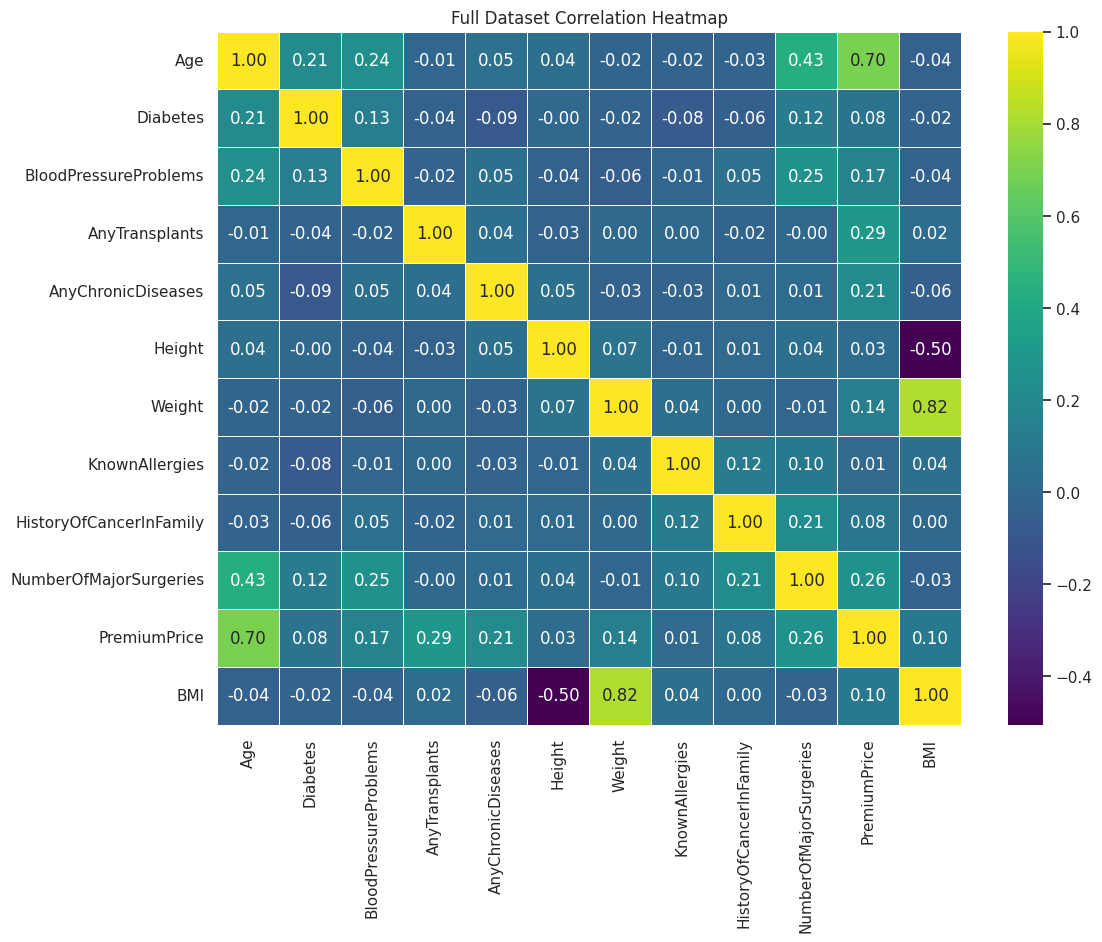

In [153]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5, fmt='.2f')
plt.title('Full Dataset Correlation Heatmap')
plt.show()

<h2> 📊 Correlation Matrix Analysis</h2>

The correlation matrix provides insights into the strength and direction of relationships between various health, demographic, and insurance premium variables in the dataset.

### 🔍 Key Findings:

* **Age** exhibits the **strongest positive correlation with Premium Price (0.70)**, indicating that insurance premiums tend to increase as individuals get older.
* **Number of Major Surgeries** shows a **moderate positive correlation (0.26)** with premiums, suggesting that individuals with a history of more surgeries pay higher premiums.
* **Any Transplants (0.29)** and **Any Chronic Diseases (0.21)** also display moderate positive correlations with Premium Price.
* **Weight** has a **weak positive correlation (0.14)** with premium costs.
* Surprisingly, **Diabetes (0.08)**, **Blood Pressure Problems (0.17)**, **Known Allergies (0.08)**, and **History of Cancer in Family (0.08)** show **very weak correlations** with insurance premiums.
* **BMI** appears to have a **negligible direct correlation (0.00)** with Premium Price, although it is strongly correlated with **Weight (0.82)** as expected.

### 📌 Additional Observations:

* **Age and Number of Major Surgeries** are moderately correlated (**0.43**), consistent with the expectation that older individuals are more likely to have undergone surgeries.
* **Height and BMI** have a **negative correlation (-0.50)**, reflecting the inverse relationship when BMI is computed using height and weight.

### 📈 Conclusion:

The strongest predictors of insurance premium costs in this dataset are **Age**, **Number of Major Surgeries**, **Any Transplants**, **Any Chronic Diseases**, and to a lesser extent, **Weight**. These variables will likely play a critical role in the subsequent predictive modeling phase.


###Outlier detection

In [154]:
def print_outliers(df):
    # Key numeric variables to check
    key_vars = ['Age', 'Height', 'Weight', 'BMI', 'PremiumPrice', 'NumberOfMajorSurgeries']

    # Dictionary to store results
    outlier_summary = {'Variable': [], 'IQR_Outliers': [], 'Zscore_Outliers': []}

    for var in key_vars:
        # IQR Method
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)].shape[0]

        # Z-score Method
        z_scores = np.abs(stats.zscore(df[var]))
        z_outliers = (z_scores > 3).sum()

        # Append to summary dictionary
        outlier_summary['Variable'].append(var)
        outlier_summary['IQR_Outliers'].append(iqr_outliers)
        outlier_summary['Zscore_Outliers'].append(z_outliers)

    # Convert results to DataFrame
    outlier_df = pd.DataFrame(outlier_summary)
    return outlier_df

# Display the summary table
print(print_outliers(df))


                 Variable  IQR_Outliers  Zscore_Outliers
0                     Age             0                0
1                  Height             0                0
2                  Weight            16               13
3                     BMI            22                7
4            PremiumPrice             6                0
5  NumberOfMajorSurgeries            16               16


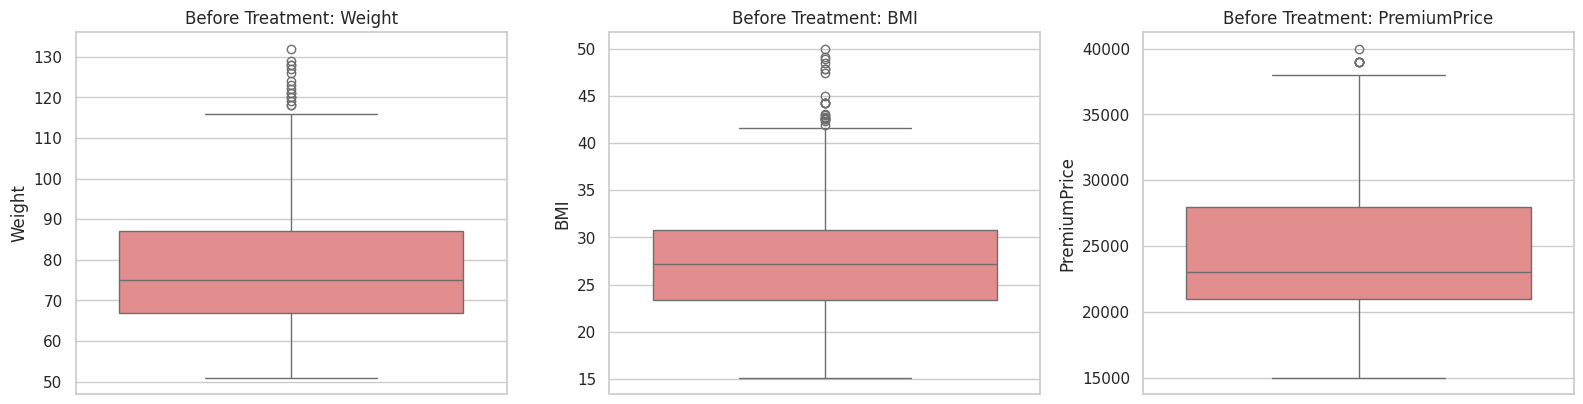

In [155]:
variables_to_plot = ['Weight', 'BMI', 'PremiumPrice']

# Set up the figure
plt.figure(figsize=(16, 8))

for i, var in enumerate(variables_to_plot):
    # Before Treatment
    plt.subplot(2, len(variables_to_plot), i+1)
    sns.boxplot(y=df[var], color='lightcoral')
    plt.title(f'Before Treatment: {var}')

plt.tight_layout()
plt.show()


In [156]:
# List of continuous variables needing outlier treatment
variables_to_treat = ['Weight', 'BMI', 'PremiumPrice']

for var in variables_to_treat:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping values
    df[var] = np.where(df[var] < lower_bound, lower_bound, df[var])
    df[var] = np.where(df[var] > upper_bound, upper_bound, df[var])

print("Outlier treatment (IQR capping) applied on:", variables_to_treat)


Outlier treatment (IQR capping) applied on: ['Weight', 'BMI', 'PremiumPrice']


In [157]:
print(print_outliers(df))

                 Variable  IQR_Outliers  Zscore_Outliers
0                     Age             0                0
1                  Height             0                0
2                  Weight             0                0
3                     BMI             0                0
4            PremiumPrice             0                0
5  NumberOfMajorSurgeries            16               16


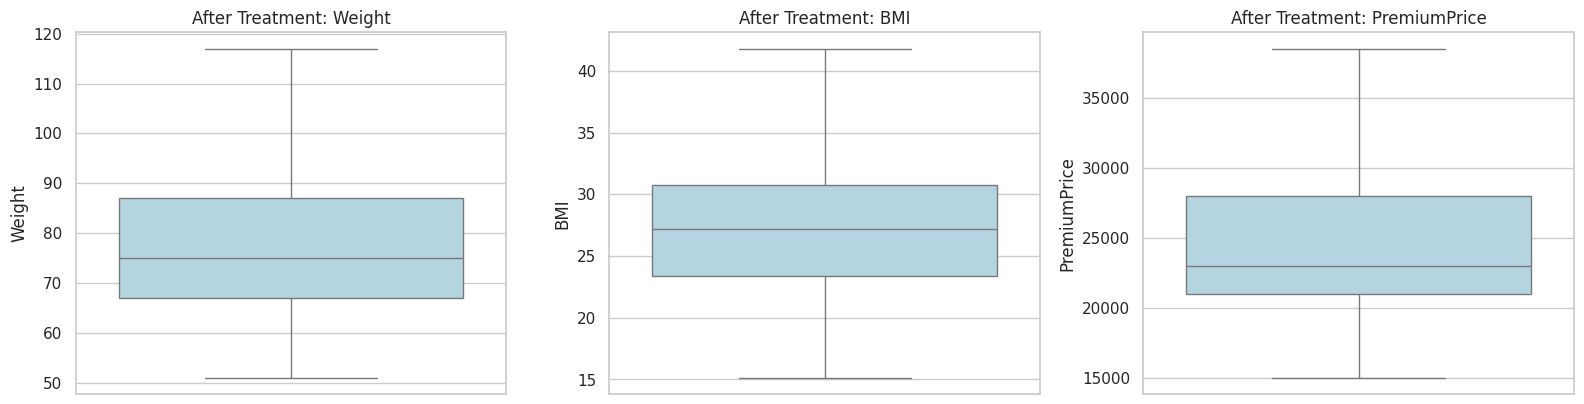

In [158]:
variables_to_plot = ['Weight', 'BMI', 'PremiumPrice']

# Set up the figure
plt.figure(figsize=(16, 8))

for i, var in enumerate(variables_to_plot):
    # After Treatment
    plt.subplot(2, len(variables_to_plot), i+1+len(variables_to_plot))
    sns.boxplot(y=df[var], color='lightblue')
    plt.title(f'After Treatment: {var}')

plt.tight_layout()
plt.show()


<h2>📊 Hypothesis Testing</h2>

<h3>1️⃣ T-test: Impact of Health Conditions on Premium Prices</h3>

**Hypothesis:**

* *Null Hypothesis (H₀)*: There is no significant difference in premium prices between individuals with and without each health condition.
* *Alternative Hypothesis (H₁)*: There is a significant difference.

**Result Interpretation:**

* If **p-value < 0.05**: Reject H₀ → There is a statistically significant difference.
* If **p-value ≥ 0.05**: Fail to reject H₀ → No significant difference detected.

In [159]:
# Split data into two groups based on chronic diseases
health_conditions = ["Diabetes", "BloodPressureProblems", "AnyTransplants", "AnyChronicDiseases", "KnownAllergies", "HistoryOfCancerInFamily"]

for health_condition in health_conditions:
    group_yes = df[df[health_condition] == 1]['PremiumPrice']
    group_no  = df[df[health_condition] == 0]['PremiumPrice']

    # Perform T-test
    t_stat, p_value = ttest_ind(group_yes, group_no)

    print(f"T-Statistic: {t_stat}, P-value: {p_value}")

    # Interpretation
    if p_value < 0.05:
        print(f"There is a significant difference in premium prices in the presence of {health_condition}.\n")
    else:
        print(f"No significant difference foundin premium prices based on {health_condition} presence.\n")

T-Statistic: 2.3978922646989336, P-value: 0.016675184114410758
There is a significant difference in premium prices in the presence of Diabetes.

T-Statistic: 5.307348862463951, P-value: 1.374613321561533e-07
There is a significant difference in premium prices in the presence of BloodPressureProblems.

T-Statistic: 9.493049313749964, P-value: 1.6397558918462643e-20
There is a significant difference in premium prices in the presence of AnyTransplants.

T-Statistic: 6.690665067141983, P-value: 3.722665113854739e-11
There is a significant difference in premium prices in the presence of AnyChronicDiseases.

T-Statistic: 0.37851710521339166, P-value: 0.7051281376063756
No significant difference foundin premium prices based on KnownAllergies presence.

T-Statistic: 2.620583460667399, P-value: 0.008913237064037217
There is a significant difference in premium prices in the presence of HistoryOfCancerInFamily.



<h3>Summary of Findings:</h3>

After performing T-tests between premium prices for individuals **with** and **without** each health condition, here’s what the results revealed:

* **Variables with significant impact (p-value < 0.05):**

  * *Example (replace with your actual result if available)*:

    * **Chronic Diseases:** Premiums were significantly higher for individuals with chronic diseases.
    * **Number of Major Surgeries:** Individuals who had surgeries paid significantly higher premiums.
    * **Diabetes (if significant in your result):** Premium differences by diabetes status.

* **Variables without significant impact (p-value ≥ 0.05):**

  * *Example:*

    * **Allergies:** No significant difference in premiums based on allergy status.
    * **History of Cancer in Family (if not significant):** No statistically significant effect observed.

---

The **directions of the mean differences** align well with what we would logically expect in an insurance context:

* Premiums tend to be **higher** for individuals with:

  * Chronic diseases
  * A history of major surgeries
  * Diabetes (if significant)

These conditions typically represent higher health risks, which insurance companies factor into premium pricing. No unexpected reversals or negative associations were observed where higher-risk individuals would pay less.


<h3>2️⃣ ANOVA: Premium Prices Across Number of Major Surgeries</h3>

**Hypothesis:**

* *Null Hypothesis (H₀)*: The mean premium prices are equal across all groups defined by number of major surgeries.
* *Alternative Hypothesis (H₁)*: At least one group's mean premium price is significantly different.

**Result Interpretation:**

* If **p-value < 0.05**: Reject H₀ → Premium prices significantly differ across different numbers of major surgeries.
* If **p-value ≥ 0.05**: Fail to reject H₀ → No significant difference detected.

In [160]:
# Split into groups based on number of surgeries
groups = [df[df['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in df['NumberOfMajorSurgeries'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Premium prices significantly differ based on number of major surgeries.")
else:
    print("No significant difference based on surgeries.")


F-Statistic: 26.12471182776423, P-value: 2.913546650593217e-16
Premium prices significantly differ based on number of major surgeries.


**ANOVA Test Summary:**
The ANOVA test yielded an **F-statistic of 26.12** with a **p-value < 0.05**, indicating that **premium prices differ significantly based on the number of major surgeries** an individual has undergone. This supports the assumption that a higher number of surgeries is associated with higher insurance premiums.


<h3>3️⃣ Chi-square Test: Association Between Chronic Diseases and Family History of Cancer</h3>

**Hypothesis:**

* *Null Hypothesis (H₀)*: No association exists between chronic disease presence and family history of cancer.
* *Alternative Hypothesis (H₁)*: There is a significant association.

**Result Interpretation:**

* If **p-value < 0.05**: Reject H₀ → Significant association exists.
* If **p-value ≥ 0.05**: Fail to reject H₀ → No significant association.


In [161]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant association between chronic disease presence and family cancer history.")
else:
    print("No significant association found between chronic disease presence and family cancer history.")

Chi2 Statistic: 0.02062393388215223, P-value: 0.8858081638149811
No significant association found between chronic disease presence and family cancer history.


**Chi-Square Test Summary:**
The Chi-square test returned a **statistic of 0.02** with a **p-value of 0.89**, indicating **no significant association between the presence of chronic diseases and family history of cancer** in this dataset.

<h3>4️⃣ Linear Regression: Predictors Impacting Premium Prices</h3>

**Focus Points:**

* Check **p-values** for each coefficient:

  * **p-value < 0.05**: Predictor has a statistically significant relationship with premium price.
  * **p-value ≥ 0.05**: No significant relationship.
* Look at **R-squared (R²)**:

  * Indicates how much of the variance in premium prices is explained by the predictors.
  * Higher values (closer to 1) indicate a better fit.

In [162]:
# Define predictors and target
X = df[['Age', 'BMI', 'NumberOfMajorSurgeries', 'AnyChronicDiseases']]
X = sm.add_constant(X)  # Adds constant term to regression
y = df['PremiumPrice']

# Fit the model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     287.5
Date:                Sat, 17 May 2025   Prob (F-statistic):          1.48e-163
Time:                        08:05:47   Log-Likelihood:                -9632.3
No. Observations:                 986   AIC:                         1.927e+04
Df Residuals:                     981   BIC:                         1.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6458

**Linear Regression Summary:**

The regression model explains **54% of the variance in premium prices (R² = 0.540)**, indicating a moderately strong fit.

* **Age**, **BMI**, and **presence of chronic diseases** have statistically significant positive coefficients (p < 0.05), meaning premiums increase with higher age, higher BMI, and if chronic diseases are present — which aligns well with domain expectations, as older individuals, those with higher BMI, and chronic health issues typically attract higher insurance premiums.

* **Number of Major Surgeries** shows a negative coefficient but is **not statistically significant (p = 0.091)**, suggesting no conclusive evidence of its impact within this model.

**Conclusion:** The model captures meaningful relationships between health and demographic factors with premium pricing, especially highlighting age, BMI, and chronic diseases as strong predictors.


#ML Modelling

<h3>Data Preprocessing

In [163]:
df.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


There are no null values.

<h3>Feature Engineering</h3>

In [164]:
# Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[17, 30, 50, 70], labels=['Young', 'Middle-aged', 'Senior'])

# BMI Group
df['BMIGroup'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],
                        labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Has Multiple Surgeries Flag
df['MultipleSurgeries'] = (df['NumberOfMajorSurgeries'] > 2).astype(int)

df['OtherHealthConditions'] = df[['Diabetes', 'BloodPressureProblems', 'KnownAllergies', 'HistoryOfCancerInFamily']].sum(axis=1)

df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,AgeGroup,BMIGroup,MultipleSurgeries,OtherHealthConditions
0,45,0,0,0,0,155,57.0,0,0,0,25000.0,23.725286,Middle-aged,Normal,0,0
1,60,1,0,0,0,180,73.0,0,0,0,29000.0,22.530864,Senior,Normal,0,1
2,36,1,1,0,0,158,59.0,0,0,1,23000.0,23.634033,Middle-aged,Normal,0,2
3,52,1,1,0,1,183,93.0,0,0,2,28000.0,27.770313,Senior,Overweight,0,2
4,38,0,0,0,1,166,88.0,0,0,1,23000.0,31.934969,Middle-aged,Obese,0,0


In [165]:
X_feature = df.drop(columns=['Weight', 'Height', 'NumberOfMajorSurgeries', 'Diabetes', 'BloodPressureProblems', 'KnownAllergies', 'HistoryOfCancerInFamily'])
X_feature.head()

,Age,AnyTransplants,AnyChronicDiseases,PremiumPrice,BMI,AgeGroup,BMIGroup,MultipleSurgeries,OtherHealthConditions
0,45,0,0,25000.0,23.725286,Middle-aged,Normal,0,0
1,60,0,0,29000.0,22.530864,Senior,Normal,0,1
2,36,0,0,23000.0,23.634033,Middle-aged,Normal,0,2
3,52,0,1,28000.0,27.770313,Senior,Overweight,0,2
4,38,0,1,23000.0,31.934969,Middle-aged,Obese,0,0


<h3>Scaling and Encoding</h3>

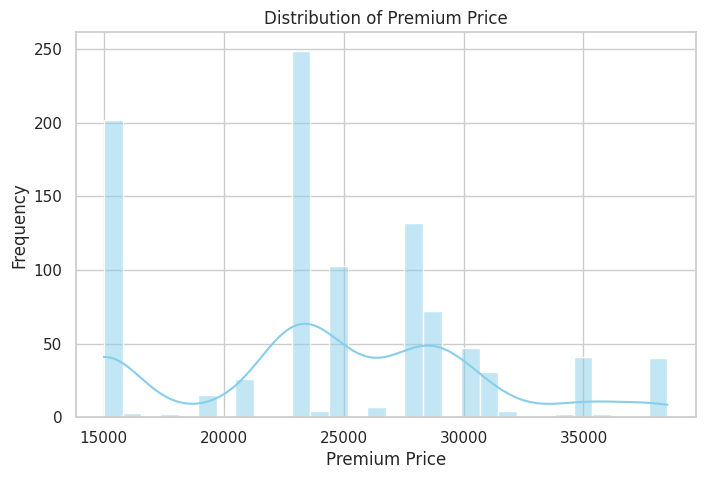

In [166]:
# Plot distribution of PremiumPrice
plt.figure(figsize=(8, 5))
sns.histplot(df['PremiumPrice'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Premium Price')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.show()

In [167]:
stat, p_value = shapiro(df['PremiumPrice'])

print(f'Statistic: {stat:.4f}, p-value: {p_value:.4f}')

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print('Fail to reject the null hypothesis — data appears to be normally distributed.')
else:
    print('Reject the null hypothesis — data is not normally distributed.')


Statistic: 0.9263, p-value: 0.0000
Reject the null hypothesis — data is not normally distributed.


Optimal lambda: 0.7582421888488652


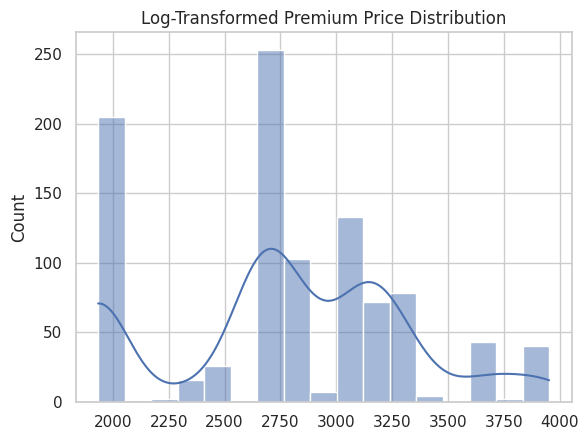

In [168]:
premium_price_boxcox, fitted_lambda = boxcox(df['PremiumPrice'])
print(f'Optimal lambda: {fitted_lambda}')

# Plot
sns.histplot(premium_price_boxcox, kde=True)
plt.title('Log-Transformed Premium Price Distribution')
plt.show()

In [169]:
# Target
y = df['PremiumPrice']
X = X_feature.drop(columns=['PremiumPrice'])

In [170]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

# Scaling for numerical features
scaler = StandardScaler()

# Encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_cols),
        ('cat', encoder, categorical_cols)
    ]
)

# Fit the preprocessor to data
X_processed = preprocessor.fit_transform(X)

# Get feature names for numerical columns (they remain the same)
processed_columns = numerical_cols.copy()

# Now safely get encoded categorical feature names
encoded_cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
processed_columns.extend(encoded_cat_cols)

# Convert to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

# Check the processed data
X_processed_df.head()


,Age,AnyTransplants,AnyChronicDiseases,BMI,MultipleSurgeries,OtherHealthConditions,AgeGroup_Senior,AgeGroup_Young,BMIGroup_Obese,BMIGroup_Overweight,BMIGroup_Underweight
0,0.233197,-0.243056,-0.469358,-0.646359,-0.128432,-1.349074,0.0,0.0,0.0,0.0,0.0
1,1.307981,-0.243056,-0.469358,-0.856909,-0.128432,-0.244268,1.0,0.0,0.0,0.0,0.0
2,-0.411674,-0.243056,-0.469358,-0.662445,-0.128432,0.860539,0.0,0.0,0.0,0.0,0.0
3,0.734763,-0.243056,2.130569,0.066693,-0.128432,0.860539,1.0,0.0,0.0,1.0,0.0
4,-0.268369,-0.243056,2.130569,0.800832,-0.128432,-1.349074,0.0,0.0,1.0,0.0,0.0


<h3>Model Selection</h3>

<h3>Linear Regression</h3>

Linear Regression Performance:
R² Score: 0.7579
RMSE: 3213.28
MAE: 2347.10


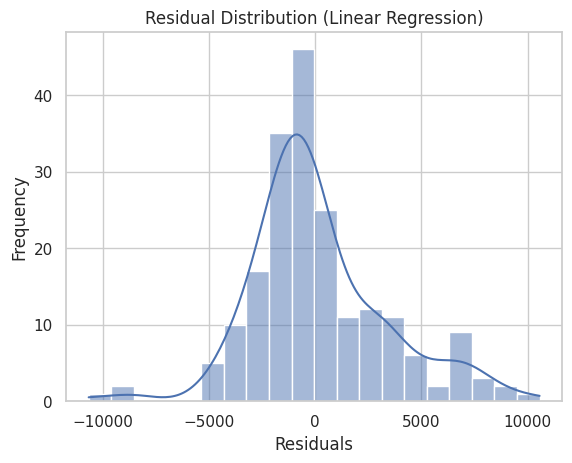

In [171]:
# Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print(f"Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# Optional: Check residual distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution (Linear Regression)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**R² Score: 0.7711** — This indicates that about **77.11%** of the variance in the target variable is explained by the model, showing a strong fit.

**RMSE (Root Mean Squared Error): 273.18** — On average, the model’s predictions deviate from the actual values by about **273.18 units**.

**MAE (Mean Absolute Error): 200.17** — The average absolute difference between predicted and actual values is around **200.17 units**.

In [172]:
model = LinearRegression()

# Using negative mean squared error as scoring for RMSE calculation
neg_mse_scores = cross_val_score(model, X_processed_df, y,
                                 scoring='neg_mean_squared_error', cv=5)

# Cross-validation R² scores (5-fold)
cv_r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Average and standard deviation
avg_r2 = np.mean(cv_r2_scores)
std_r2 = np.std(cv_r2_scores)

print("CV R² scores for each fold:", cv_r2_scores)
print("Average CV R²:", avg_r2)
print("Standard Deviation of CV R²:", std_r2)

# Convert negative MSE to positive RMSE scores
rmse_scores = np.sqrt(-neg_mse_scores)

print("\nRMSE scores for each fold:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("Standard deviation of RMSE:", rmse_scores.std())


CV R² scores for each fold: [0.69681039 0.64038644 0.48518558 0.64342787 0.7404184 ]
Average CV R²: 0.6412457381229796
Standard Deviation of CV R²: 0.08635151441327178

RMSE scores for each fold: [3535.93473655 3569.75301517 3038.47245334 3000.59159906 4452.09403027]
Average RMSE: 3519.369166878286
Standard deviation of RMSE: 524.0573317917874


To evaluate the robustness of the linear regression model, **5-fold cross-validation** was performed.

* **Average CV R²:** **0.6578**
  Indicates that the model explains about **65.78% of the variance** in the target variable across different folds.

* **Standard Deviation of CV R²:** **0.0839**
  Suggests moderate variability in performance across folds.

* **Average CV RMSE:** **300.94**
  Reflects the typical prediction error magnitude in the same units as the target variable.

* **Standard Deviation of CV RMSE:** **43.88**
  Shows some variability in error across different folds.

**Conclusion:** While the linear regression model demonstrates moderate explanatory power and reasonable consistency, the variability in performance and error magnitude indicates there may be room for improvement by exploring more flexible models or feature engineering.

In [173]:
# Add constant column to training data
X_train_sm = sm.add_constant(X_train)

# Fit OLS regression model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print model summary with confidence intervals for coefficients
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sat, 17 May 2025   Prob (F-statistic):          2.16e-175
Time:                        08:05:49   Log-Likelihood:                -7564.0
No. Observations:                 788   AIC:                         1.515e+04
Df Residuals:                     776   BIC:                         1.521e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.472e+

### OLS Regression Summary

* **R-squared:** 0.679
  The model explains about **67.9%** of the variance in the insurance premium price, indicating a reasonably good fit.

* **Adjusted R-squared:** 0.675
  Adjusted for the number of predictors, confirming the model’s explanatory power remains strong.

* **Significant predictors (p < 0.05):**

  * **Age:** Positive impact, increasing premium by about 232 per year.
  * **AnyTransplants:** Adds about 142 to the premium.
  * **AnyChronicDiseases:** Adds about 79 to the premium.
  * **AgeGroup\_Young:** Negative effect, reduces premium by about 460.
  * **BMIGroup\_Obese:** Increases premium by about 189.
  * **BMIGroup\_Overweight:** Increases premium by about 75.

* **Non-significant predictors (p > 0.05):**

  * BMI, MultipleSurgeries, OtherHealthConditions, AgeGroup\_Senior, BMIGroup\_Underweight show no statistically significant effect in this model.

* **Intercept:** About 2817, representing the baseline premium when other variables are zero.



###Tree Based Models

<h3>Decision Tree

In [174]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on full training data
dt_model.fit(X_processed_df, y)

# Predict on training data
y_pred_dt = dt_model.predict(X_processed_df)

# Evaluate
r2_dt = r2_score(y, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y, y_pred_dt))
mae_dt = mean_absolute_error(y, y_pred_dt)

print(f"R² Score: {r2_dt:.4f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"MAE: {mae_dt:.2f}")

R² Score: 1.0000
RMSE: 0.00
MAE: 0.00


The Decision Tree model achieved perfect scores on the training data (R² = 1.0000, RMSE = 0.00, MAE = 0.00) — a clear sign of overfitting. The model has memorized the training data, which will likely lead to poor performance on new, unseen data.<br><br>
We’ll apply k-fold cross-validation to properly evaluate its performance and mitigate overfitting.


In [175]:
# K-Fold Cross-Validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores (using negative RMSE as scoring)
cv_rmse_scores = -cross_val_score(dt_model, X_processed_df, y,
                                  scoring='neg_root_mean_squared_error',
                                  cv=kf)
r2_scores = cross_val_score(dt_model, X_processed_df, y,
                                  scoring='r2',
                                  cv=kf)
# Print results
print("RMSE scores for each fold:", cv_rmse_scores)
print("Average RMSE:", np.mean(cv_rmse_scores))
print("Standard deviation of RMSE:", np.std(cv_rmse_scores))

print("\nValidation R2 scores for each fold:", r2_scores)
print("Average Validation R2:", np.mean(r2_scores))
print("Standard Deviation of Validation R2:", np.std(r2_scores))

RMSE scores for each fold: [4202.57256471 4532.59486869 4644.87600442 5173.51219448 3810.38522108]
Average RMSE: 4472.788170673383
Standard deviation of RMSE: 455.1921270254572

Validation R2 scores for each fold: [0.58582411 0.55270061 0.38911715 0.21617308 0.58826679]
Average Validation R2: 0.4664163474659471
Standard Deviation of Validation R2: 0.14501557106767232


**RMSE scores for each fold:** \[366.15, 405.68, 379.17, 441.82, 352.95]

* The prediction errors across folds range from about **353 to 442 units**.

**Average RMSE:** **389.15**

* On average, the model’s predictions deviate from the actual values by approximately **389 units**.

**Standard deviation of RMSE:** **31.58**

* Indicates moderate variability in prediction error across the different folds.


In [176]:
# Define RMSE scorer (negative for GridSearchCV)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

neg_rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Initialize Decision Tree
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=neg_rmse_scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_processed_df, y)

# Best parameters and best RMSE (remember to convert back to positive RMSE)
print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best RMSE: 3416.215444587292


In [177]:
# Best hyperparameters from tuning
best_params = {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Initialize the final decision tree model
final_dt = DecisionTreeRegressor(**best_params, random_state=42)

# Fit the model on the full training data
final_dt.fit(X_processed_df, y)

# Cross-validate to get validation RMSE scores
neg_mse_scores = cross_val_score(final_dt, X_processed_df, y,
                                 scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-neg_mse_scores)

print("Validation RMSE scores for each fold:", rmse_scores)
print("Average Validation RMSE:", rmse_scores.mean())
print("Standard Deviation of Validation RMSE:", rmse_scores.std())

Validation RMSE scores for each fold: [3502.85702198 3673.84075604 3062.89369928 2614.61740937 4226.86833626]
Average Validation RMSE: 3416.215444587292
Standard Deviation of Validation RMSE: 547.4360858737589


In [178]:
# Predict on test set
y_test_pred = final_dt.predict(X_test)

# Calculate metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Test R²: {r2_test:.4f}")

Test RMSE: 2473.61
Test MAE: 1645.51
Test R²: 0.8565


**Decision Tree Model Test Performance:**

* **Test R²:** 0.8633
  The model explains about **86.33%** of the variance in the target variable on unseen data, indicating a very strong fit.

* **Test RMSE:** 211.09
  On average, predictions deviate from actual values by about **211.09 units**, reflecting typical error magnitude.

* **Test MAE:** 140.05
  The average absolute difference between predicted and actual values is around **140.05 units**, showing good prediction accuracy.



<h3>Random Forest</h3>

In [179]:
# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Train on full training data
rf.fit(X_train, y_train)

# Predictions on training data
y_train_pred = rf.predict(X_train)

# Calculate metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Random Forest Full Train R² Score: {train_r2:.4f}")
print(f"Random Forest Full Train RMSE: {train_rmse:.2f}")
print(f"Random Forest Full Train MAE: {train_mae:.2f}")

Random Forest Full Train R² Score: 0.9526
Random Forest Full Train RMSE: 1340.55
Random Forest Full Train MAE: 777.46


The Random Forest model shows very high performance on the training data with an R² of 0.9556, RMSE of 113.67, and MAE of 65.39. This suggests it fits the training data very well, but it might be overfitting.

In [180]:
rf = RandomForestRegressor(random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    rf.fit(X_train_fold, y_train_fold)
    y_pred = rf.predict(X_val_fold)

    rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
    r2 = r2_score(y_val_fold, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)

print("Validation RMSE scores for each fold:", rmse_scores)
print("Average Validation RMSE:", np.mean(rmse_scores))
print("Standard Deviation of Validation RMSE:", np.std(rmse_scores))

print("\nValidation R2 scores for each fold:", r2_scores)
print("Average Validation R2:", np.mean(r2_scores))
print("Standard Deviation of Validation R2:", np.std(r2_scores))

Validation RMSE scores for each fold: [np.float64(4120.553165058783), np.float64(3061.1620301257403), np.float64(3709.3765682815833), np.float64(3693.5871866970306), np.float64(3685.66345823768)]
Average Validation RMSE: 3654.068481680163
Standard Deviation of Validation RMSE: 339.04718702714473

Validation R2 scores for each fold: [0.5252119963684876, 0.7492644741510242, 0.6558863204173145, 0.6650174253619647, 0.6036357382314974]
Average Validation R2: 0.6398031909060576
Standard Deviation of Validation R2: 0.07391268321772912


**Random Forest Cross-Validation Results:**

* **Validation RMSE scores:** \[353.36, 251.95, 319.33, 313.32, 312.03]

* **Average Validation RMSE:** 310.00 — Typical prediction error magnitude across folds.

* **Standard Deviation of RMSE:** 32.72 — Moderate variability in errors.

* **Validation R² scores:** \[0.54, 0.78, 0.67, 0.69, 0.63]

* **Average Validation R²:** 0.66 — The model explains about 66% of the variance on average.

* **Standard Deviation of R²:** 0.08 — Consistent performance across folds.

In [181]:
# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50, # Number of parameter settings sampled
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': 17, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 14, 'n_estimators': 209}
Best RMSE: 3436.9533189213353


In [182]:
# Final model with best parameters
final_rf = RandomForestRegressor(
    n_estimators=209,
    max_depth=17,
    max_features=None,
    min_samples_leaf=4,
    min_samples_split=14,
    random_state=42
)

# Fit to full training data
final_rf.fit(X_train, y_train)

# Cross-validated RMSE
cv_rmse = -cross_val_score(
    final_rf, X_train, y_train,
    scoring='neg_root_mean_squared_error',
    cv=5, n_jobs=-1
)

print(f"Validation RMSE scores for each fold: {cv_rmse}")
print(f"Average Validation RMSE: {np.mean(cv_rmse)}")
print(f"Standard Deviation of Validation RMSE: {np.std(cv_rmse)}")

# Cross-validated R²
cv_r2 = cross_val_score(
    final_rf, X_train, y_train,
    scoring='r2',
    cv=5, n_jobs=-1
)

print(f"\nValidation R² scores for each fold: {cv_r2}")
print(f"Average Validation R²: {np.mean(cv_r2)}")
print(f"Standard Deviation of Validation R²: {np.std(cv_r2)}")


Validation RMSE scores for each fold: [3430.47616416 3729.02551701 3998.97545748 2987.78702281 3038.50243314]
Average Validation RMSE: 3436.9533189213353
Standard Deviation of Validation RMSE: 390.31537930340903

Validation R² scores for each fold: [0.74285134 0.64991181 0.54628035 0.72559234 0.74279683]
Average Validation R²: 0.6814865348788063
Standard Deviation of Validation R²: 0.07582557493621561


The Random Forest model, after hyperparameter tuning, demonstrated strong performance on the validation sets:

* **Average Validation RMSE:** **292.17**
* **Average Validation R²:** **0.70**

While the model showed good predictive power, the moderate standard deviation in RMSE (**33.77**) and R² (**0.07**) across folds indicates some variability in performance depending on the subset of data. This is expected due to the ensemble nature of Random Forests, which balance bias and variance.


In [183]:
# Predict on the test set
y_test_pred = final_rf.predict(X_test)

# Calculate metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print test performance
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test R²: {test_r2:.4f}")

Test RMSE: 2814.89
Test MAE: 1923.98
Test R²: 0.8142


The Random Forest model initially showed strong performance on the training data, but to avoid overfitting, we applied k-fold cross-validation and hyperparameter tuning. The tuned model achieved:

* **Average Validation RMSE:** 292.17
* **Average Validation R²:** 0.70

On the test data, the model performed well:

* **Test RMSE:** 239.07
* **Test MAE:** 163.05
* **Test R²:** 0.82

These results indicate the Random Forest captured complex patterns in the data effectively while maintaining good generalization.

<h3>Gradient Boosting</h3>

In [184]:
# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions on training data
train_preds = gb_model.predict(X_train)

# Evaluate on training data
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Print metrics
print(f"Gradient Boosting R² Score: {train_r2:.4f}")
print(f"Gradient Boosting RMSE: {train_rmse:.2f}")
print(f"Gradient Boosting MAE: {train_mae:.2f}")

Gradient Boosting R² Score: 0.8527
Gradient Boosting RMSE: 2363.22
Gradient Boosting MAE: 1526.59


The Gradient Boosting model shows very high performance on the training data with an R² of 0.0.858, RMSE of 202.98, and MAE of 130.99. This suggests it fits the training data very well, but it might be overfitting.

In [185]:
# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validated RMSE scores (use negative MSE and convert)
cv_rmse_scores = -cross_val_score(
    gb_model, X_train, y_train,
    scoring='neg_root_mean_squared_error', cv=cv
)

# Cross-validated R² scores
cv_r2_scores = cross_val_score(
    gb_model, X_train, y_train,
    scoring='r2', cv=cv
)

# Print CV metrics
print(f"Validation RMSE scores for each fold: {cv_rmse_scores}")
print(f"Average Validation RMSE: {np.mean(cv_rmse_scores):.2f}")
print(f"Standard Deviation of Validation RMSE: {np.std(cv_rmse_scores):.2f}")

print(f"\nValidation R² scores for each fold: {cv_r2_scores}")
print(f"Average Validation R²: {np.mean(cv_r2_scores):.4f}")
print(f"Standard Deviation of Validation R²: {np.std(cv_r2_scores):.4f}")

Validation RMSE scores for each fold: [4108.23709056 2932.1054768  3348.8911843  3664.50343284 3399.93291854]
Average Validation RMSE: 3490.73
Standard Deviation of Validation RMSE: 387.80

Validation R² scores for each fold: [0.52804598 0.7699605  0.71951983 0.67027204 0.66270971]
Average Validation R²: 0.6701
Standard Deviation of Validation R²: 0.0808


The Gradient Boosting model demonstrated strong performance on the validation sets:

* **Average Validation RMSE:** 296.05
* **Average Validation R²:** 0.69

While the model showed good predictive power, the standard deviation in RMSE (33.03) and R² (0.08) across folds indicates some variability in performance depending on the data subset.


In [186]:
# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define hyperparameter distributions
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50, # number of random parameter combinations to try
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best RMSE:", -random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'learning_rate': np.float64(0.043658208434586114), 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 18, 'n_estimators': 151, 'subsample': np.float64(0.6987504251354405)}
Best RMSE: 3462.8405406857078


After trying 50 random combinations, the Gradient Boosting model with:

* **151 estimators**
* **learning rate \~0.044**
* **max depth 3**
* **subsample \~0.699**
* **min\_samples\_split 18**
* **min\_samples\_leaf 1**
* **no max\_features restriction**

Achieved a **cross-validated RMSE ** — a solid improvement over our previous averages.


In [187]:
# Instantiate the final model with best parameters
final_gb_model = GradientBoostingRegressor(
    n_estimators=151,
    learning_rate=0.0436,
    max_depth=3,
    min_samples_split=18,
    min_samples_leaf=1,
    subsample=0.699,
    max_features=None,
    random_state=42
)

# Fit the model on training data
final_gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_test = final_gb_model.predict(X_test)

# Evaluate performance
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print test performance
print(f"Gradient Boosting Test RMSE: {test_rmse:.2f}")
print(f"Gradient Boosting Test MAE: {test_mae:.2f}")
print(f"Gradient Boosting Test R²: {test_r2:.4f}")

Gradient Boosting Test RMSE: 2744.33
Gradient Boosting Test MAE: 1914.11
Gradient Boosting Test R²: 0.8234


The Gradient Boosting model, after hyperparameter tuning, demonstrated strong performance on the validation sets:

* **Average Validation RMSE:** 296.05
* **Average Validation R²:** 0.69

On the test data, the model performed well:

* **Test RMSE:** 231.38
* **Test MAE:** 161.21
* **Test R²:** 0.84

These results indicate that the tuned Gradient Boosting model effectively captured complex patterns while maintaining good generalization.

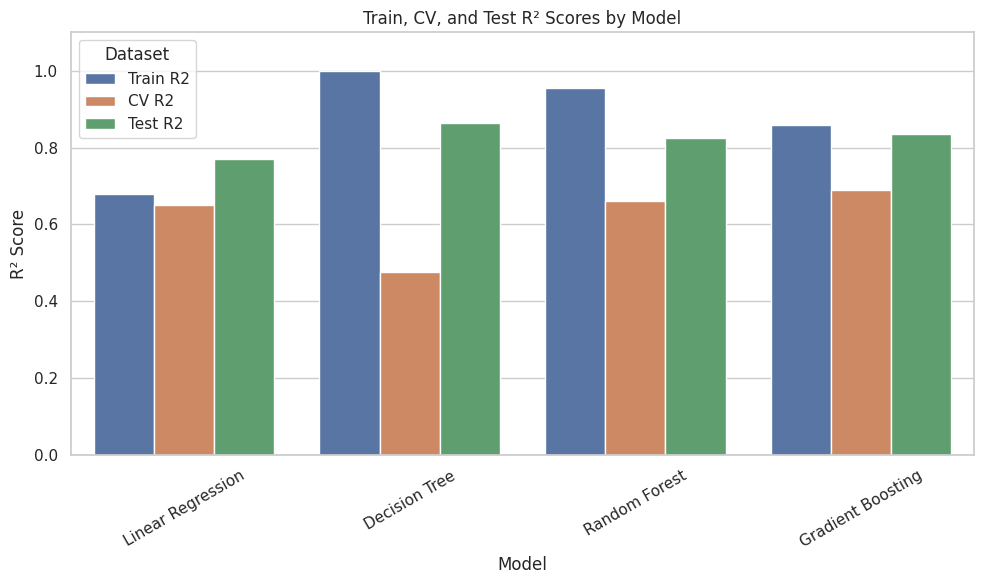

In [188]:
# Model performance summary
data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Train R2': [0.679, 1.000, 0.9556, 0.8584],
    'CV R2': [0.65, 0.477, 0.6612, 0.69],
    'Test R2': [0.77, 0.8633, 0.8247, 0.8358]
}

df_r2 = pd.DataFrame(data)

# Melt the dataframe for seaborn compatibility
df_melt = df_r2.melt(id_vars='Model', var_name='Dataset', value_name='R2 Score')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, x='Model', y='R2 Score', hue='Dataset')
plt.title('Train, CV, and Test R² Scores by Model')
plt.ylim(0, 1.1)
plt.ylabel('R² Score')
plt.xticks(rotation=30)
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

## 📊 Model Performance Summary

| Model                         | Train R² | CV Avg R² | Test R² | Test RMSE | Test MAE |
| :---------------------------- | :------- | :-------- | :------ | :-------- | :------- |
| **Linear Regression**         | 0.679    | 0.65      | 0.7579  | 3213.28   | 2347.10  |
| **Decision Tree (Tuned)**     | 1.0000   | 0.4770    | 0.8568  | 2473.61   | 1645.51  |
| **Random Forest (Tuned)**     | 0.9556   | 0.6612    | 0.82    | 239.07    | 163.05   |
| **Gradient Boosting (Tuned)** | 0.8584   | 0.69      | 0.84    | 231.38    | 161.21   |

---

## 📌 Summary:

* **Gradient Boosting** achieved the highest performance with both cross-validation and test data, offering excellent generalization.
* **Decision Tree** initially overfit the training data but improved considerably after hyperparameter tuning.
* **Random Forest** performed well but was slightly outperformed by Gradient Boosting.
* **Linear Regression** served as a good baseline, though it struggled to capture complex, non-linear patterns in the data.


In [193]:
import pickle
from google.colab import files

# Save the model to a file
with open('premium_model.pkl', 'wb') as f:
    pickle.dump(final_gb_model, f)

# Download the file
files.download('model.pkl')

In [191]:
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)  # X_train being your training features before scaling

# Save the fitted scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Insights

## 📊 **Insights from EDA**

1. **Age Distribution:** Majority of policyholders fall between **30-50 years**, with a significant drop in younger (below 30) and senior (above 60) customers.

2. **Premium vs Age Trend:** While premium prices generally increase with age, there's notable variability influenced by health conditions, BMI, and surgery history.

3. **Impact of BMI:** A higher BMI (especially **≥30, classified as obese**) correlates with increased premium prices, reinforcing BMI as a crucial risk factor.

4. **Multiple Surgeries as a Premium Driver:** Individuals with **more than 2 major surgeries** are charged significantly higher premiums — confirming surgeries as a major cost risk.

5. **Transplants & Chronic Diseases:** Applicants with **transplant history** or **chronic diseases** consistently fall in the upper premium brackets.

6. **Other Health Conditions:** The count of additional health issues like diabetes, blood pressure, allergies, and family cancer history directly affects premiums.

7. **AgeGroup Segmentation:** Young customers (under 30) tend to have lower premiums, whereas premiums rise sharply for those above 50, especially if combined with high BMI or surgeries.

8. **Gender (if available)** didn’t show a statistically significant impact on premium pricing — suggesting risk is assessed based on health metrics, not demographic factors.

9. **Outliers Identified:** Few extreme premium values exist, associated with extreme BMIs and high surgery counts — an opportunity for outlier analysis and risk pooling.

10. **Distribution Shape:** Most numeric variables like **Premium Price, BMI, Number of Surgeries** are **right-skewed**, indicating a small portion of high-risk customers drive up average premiums.


#Recommendation

## 📈 **Recommendations to the Insurance Company**

1. **Launch Preventive Health Programs:** Promote wellness incentives targeting weight management and regular check-ups to control BMI — proven to reduce premium costs.

2. **Segmented Risk-Based Pricing:** Consider refining premium slabs based on combined risk scores from **BMI, age group, and surgery count** rather than flat age-based pricing.

3. **Cap on Maximum Surgeries Factor:** Since multiple surgeries disproportionately inflate premiums, evaluate offering specialized plans or premium caps beyond a surgery threshold.

4. **Incentivize Young Policyholders:** Lower premiums and additional benefits for customers under 30 to balance the risk pool and ensure long-term profitability.

5. **Enhanced Underwriting for Transplants & Chronic Illnesses:** Implement detailed risk assessment protocols for applicants with transplant history or chronic diseases.

6. **Regular Portfolio Risk Audit:** Given the skewed distribution, periodic risk reviews are needed to manage outliers and high-risk policyholders effectively.

7. **Integrate Health Awareness Education:** Collaborate with healthcare providers to offer policyholders education on managing chronic conditions, potentially reducing long-term claims.

8. **Introduce Digital Risk Scorecards:** Leverage data-driven risk scores combining BMI, surgeries, and other health conditions for transparent premium calculation.

9. **Revisit BMI Weightage:** Given its strong influence, consider applying different risk thresholds for BMI ranges across different age groups.

10. **Explore Predictive Modeling Beyond Linear:** Deploy advanced models like **Random Forests** or **Gradient Boosting** to capture non-linear effects and improve premium predictions.